In [103]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
from pyspark.sql import SparkSession
import findspark as fs
fs.init()

In [106]:
spark = SparkSession.builder.getOrCreate()

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
df = spark.read.format("csv")\
    .option("sep",",")\
        .option("inferSchema","true")\
            .option("header","true")\
                .load("/content/drive/MyDrive/content/weatherAUS.csv")

In [109]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



> <h1>Tipando correctamente</h1>

In [110]:
df = df.withColumn("Date", df["Date"].cast("date"))
df = df.withColumn("MinTemp", df["MinTemp"].cast("float"))
df = df.withColumn("MaxTemp", df["MaxTemp"].cast("float"))
df = df.withColumn("Rainfall", df["Rainfall"].cast("float"))
df = df.withColumn("Evaporation", df["Evaporation"].cast("float"))
df = df.withColumn("Sunshine", df["Sunshine"].cast("float"))
df = df.withColumn("WindGustSpeed", df["WindGustSpeed"].cast("int"))
df = df.withColumn("WindSpeed9am", df["WindSpeed9am"].cast("int"))
df = df.withColumn("WindSpeed3pm", df["WindSpeed3pm"].cast("int"))
df = df.withColumn("Humidity9am", df["Humidity9am"].cast("int"))
df = df.withColumn("Humidity3pm", df["Humidity3pm"].cast("int"))
df = df.withColumn("Pressure9am", df["Pressure9am"].cast("float"))
df = df.withColumn("Pressure3pm", df["Pressure3pm"].cast("float"))
df = df.withColumn("Cloud9am", df["Cloud9am"].cast("int"))
df = df.withColumn("Cloud3pm", df["Cloud3pm"].cast("int"))
df = df.withColumn("Temp9am", df["Temp9am"].cast("float"))
df = df.withColumn("Temp3pm", df["Temp3pm"].cast("float"))
df.show()

+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|       null|    null|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|    null|   16.9|   21.8|       No|          No|
|2008-12-02|

<h1> Transformando

<h2> Trabajando con datos faltantes

In [111]:
for col in df.columns:
    print(col," ",df.filter(df[col].isNull()).count() )

Date   0
Location   0
MinTemp   1485
MaxTemp   1261
Rainfall   3261
Evaporation   62790
Sunshine   69835
WindGustDir   0
WindGustSpeed   10263
WindDir9am   0
WindDir3pm   0
WindSpeed9am   1767
WindSpeed3pm   3062
Humidity9am   2654
Humidity3pm   4507
Pressure9am   15065
Pressure3pm   15028
Cloud9am   55888
Cloud3pm   59358
Temp9am   1767
Temp3pm   3609
RainToday   0
RainTomorrow   0


In [112]:
print(df.count())

145460


<h3> Se eliminan los atributos Evaporation, Sunshine, Cloud9am y Cloud3pm por tener más de 1/3 de sus valores nulos

In [113]:
df =df.drop("Evaporation", "Sunshine", "Cloud9am", "Cloud3pm")


<h3> Los valores faltantes de las otras variables meteorológicas se completarán con la media

In [114]:
df.agg({"MinTemp":"avg",
        "MaxTemp":"avg",
        "Rainfall":"avg",
        "WindGustSpeed":"avg",
        "WindSpeed9am":"avg",   
        "WindSpeed3pm":"avg"}).show()   

+------------------+------------------+------------------+------------------+------------------+------------------+
|avg(WindGustSpeed)|     avg(Rainfall)| avg(WindSpeed9am)|      avg(MinTemp)| avg(WindSpeed3pm)|      avg(MaxTemp)|
+------------------+------------------+------------------+------------------+------------------+------------------+
| 40.03523007167319|2.3609181508908756|14.043425914971502|12.194034381779941|18.662656778887342|23.221348273321002|
+------------------+------------------+------------------+------------------+------------------+------------------+



In [115]:
df = df.na.fill(12.2,subset=["MinTemp"])
df = df.na.fill(23.22,subset=["MaxTemp"])
df = df.na.fill(40,subset=["WindGustSpeed"])
df = df.na.fill(2.36,subset=["Rainfall"])
df = df.na.fill(14,subset=["WindSpeed9am"])
df = df.na.fill(19,subset=["WindSpeed3pm"])

In [116]:
df.agg({"Humidity9am":"avg",   
        "Humidity3pm":"avg",   
        "Pressure9am":"avg",  
        "Pressure3pm":"avg",
        "Temp9am":"avg",  
        "Temp3pm":"avg"}).show()   

+----------------+------------------+-----------------+------------------+-----------------+------------------+
|avg(Humidity3pm)|  avg(Pressure9am)| avg(Humidity9am)|  avg(Pressure3pm)|     avg(Temp3pm)|      avg(Temp9am)|
+----------------+------------------+-----------------+------------------+-----------------+------------------+
|51.5391158755046|1017.6499397947478|68.88083133761887|1015.2558887915008|21.68339031665222|16.990631418377568|
+----------------+------------------+-----------------+------------------+-----------------+------------------+



In [117]:
df = df.na.fill(1017.7,subset=["Pressure9am"])
df = df.na.fill(1015.3,subset=["Pressure3pm"])
df = df.na.fill(69,subset=["Humidity9am"])
df = df.na.fill(52,subset=["Humidity3pm"])
df = df.na.fill(17.0,subset=["Temp9am"])
df = df.na.fill(21.7,subset=["Temp3pm"])

In [118]:
for col in df.columns:
    print(col," ",df.filter(df[col].isNull()).count() )

Date   0
Location   0
MinTemp   0
MaxTemp   0
Rainfall   0
WindGustDir   0
WindGustSpeed   0
WindDir9am   0
WindDir3pm   0
WindSpeed9am   0
WindSpeed3pm   0
Humidity9am   0
Humidity3pm   0
Pressure9am   0
Pressure3pm   0
Temp9am   0
Temp3pm   0
RainToday   0
RainTomorrow   0


In [119]:
df.groupBy("RainToday","RainTomorrow").count().show()

+---------+------------+-----+
|RainToday|RainTomorrow|count|
+---------+------------+-----+
|       NA|         Yes|  676|
|      Yes|         Yes|14597|
|       No|          No|92728|
|       No|          NA|  987|
|      Yes|          No|16858|
|       NA|          No|  730|
|       NA|          NA| 1855|
|       No|         Yes|16604|
|      Yes|          NA|  425|
+---------+------------+-----+



<h3> Se aprecia que el valor NA no es válido para si llovió o no. Siendo RainTomorrow el valor a predecir y RainToday esencial para esa predicción, se eliminan todas las tuplas en las que uno de estos dos atributos posea ese valor.

In [120]:
df.groupBy("RainToday","RainTomorrow").count().show()


+---------+------------+-----+
|RainToday|RainTomorrow|count|
+---------+------------+-----+
|       NA|         Yes|  676|
|      Yes|         Yes|14597|
|       No|          No|92728|
|       No|          NA|  987|
|      Yes|          No|16858|
|       NA|          No|  730|
|       NA|          NA| 1855|
|       No|         Yes|16604|
|      Yes|          NA|  425|
+---------+------------+-----+



In [121]:
df = df.filter(df.RainToday != "NA")
df = df.filter(df.RainTomorrow != "NA")

In [122]:
df.groupBy("RainToday","RainTomorrow").count().show()

+---------+------------+-----+
|RainToday|RainTomorrow|count|
+---------+------------+-----+
|      Yes|         Yes|14597|
|       No|          No|92728|
|      Yes|          No|16858|
|       No|         Yes|16604|
+---------+------------+-----+



In [123]:
df.count()

140787

<h3> Veamos las estadísticas

In [124]:
num_cols = [col[0] for col in df.dtypes if col[1]=="int" or col[1]=="float"]
print(num_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [125]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Summarizer

summarizer = Summarizer.metrics("mean","std")

vecAssembler = VectorAssembler(outputCol="features")

vecAssembler.setInputCols(num_cols)
vector_df = vecAssembler.transform(df)
vector_df.features

Column<'features'>

In [126]:
print(num_cols)

print(vector_df.select(Summarizer.mean(vector_df.features)).collect())

vector_df.select(Summarizer.std(vector_df.features)).collect()
    


['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
[Row(mean(features)=DenseVector([12.1849, 23.2351, 2.35, 39.9724, 13.9906, 18.6378, 68.8287, 51.463, 1017.659, 1015.2621, 16.9871, 21.6933]))]


[Row(std(features)=DenseVector([6.3932, 7.1067, 8.4652, 13.1318, 8.8529, 8.7188, 18.9607, 20.5471, 6.7492, 6.6825, 6.4809, 6.8728]))]

<h3> Veamos la correlación

In [127]:
from pyspark.ml.stat import Correlation

# compute r1 0 Pearson correlation
r1 = Correlation.corr(vector_df, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0])+ "\n")

Pearson correlation matrix:
DenseMatrix([[ 1.        ,  0.73444283,  0.10375978,  0.17410708,  0.17492971,
               0.17438453, -0.23287998,  0.00577637, -0.42521122, -0.4351291 ,
               0.89893955,  0.70021913],
             [ 0.73444283,  1.        , -0.07460166,  0.06713946,  0.01440618,
               0.0506871 , -0.50143741, -0.50055238, -0.30939075, -0.39802387,
               0.8817381 ,  0.97034128],
             [ 0.10375978, -0.07460166,  1.        ,  0.1279515 ,  0.08638767,
               0.05710754,  0.22216978,  0.25072481, -0.16039851, -0.1209499 ,
               0.01142786, -0.07791177],
             [ 0.17410708,  0.06713946,  0.1279515 ,  1.        ,  0.57815673,
               0.65899914, -0.20913422, -0.02575603, -0.42686455, -0.38490115,
               0.14724441,  0.03280452],
             [ 0.17492971,  0.01440618,  0.08638767,  0.57815673,  1.        ,
               0.51333483, -0.26884865, -0.03116889, -0.21503559, -0.16489759,
               0.1

In [128]:
import numpy as np


In [129]:

for i in range(0,len(num_cols)):
    for j in range(0,len(num_cols)):
        print(np.round(r1[0][i,j],2), end="\t")
    print()


1.0	0.73	0.1	0.17	0.17	0.17	-0.23	0.01	-0.43	-0.44	0.9	0.7	
0.73	1.0	-0.07	0.07	0.01	0.05	-0.5	-0.5	-0.31	-0.4	0.88	0.97	
0.1	-0.07	1.0	0.13	0.09	0.06	0.22	0.25	-0.16	-0.12	0.01	-0.08	
0.17	0.07	0.13	1.0	0.58	0.66	-0.21	-0.03	-0.43	-0.38	0.15	0.03	
0.17	0.01	0.09	0.58	1.0	0.51	-0.27	-0.03	-0.22	-0.16	0.13	0.0	
0.17	0.05	0.06	0.66	0.51	1.0	-0.14	0.02	-0.28	-0.24	0.16	0.03	
-0.23	-0.5	0.22	-0.21	-0.27	-0.14	1.0	0.66	0.13	0.18	-0.47	-0.49	
0.01	-0.5	0.25	-0.03	-0.03	0.02	0.66	1.0	-0.03	0.05	-0.22	-0.56	
-0.43	-0.31	-0.16	-0.43	-0.22	-0.28	0.13	-0.03	1.0	0.96	-0.4	-0.27	
-0.44	-0.4	-0.12	-0.38	-0.16	-0.24	0.18	0.05	0.96	1.0	-0.44	-0.36	
0.9	0.88	0.01	0.15	0.13	0.16	-0.47	-0.22	-0.4	-0.44	1.0	0.85	
0.7	0.97	-0.08	0.03	0.0	0.03	-0.49	-0.56	-0.27	-0.36	0.85	1.0	


<h3> Se puede apreciar una alta correlacion entre las temperaturas a las 9am y a las 3pm con las Temperaturas Maxima y Minima. Por lo tanto excluiremos también estos rasgos<\h3>
<h3> También se aprecia que los dos valores de presión se encuentran altamente correlacionados. (Se resuelve luego)

In [130]:
df = df.drop('Temp9am', 'Temp3pm')

<Axes: xlabel='Date'>

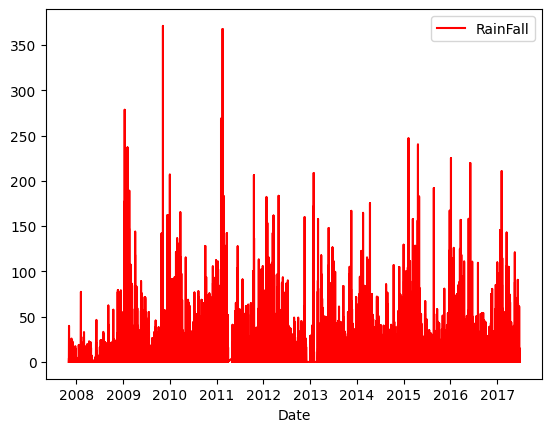

In [131]:
sql = df.select('RainFall','Date')
pandasDF = sql.toPandas()
pandasDF.plot(kind='line',x='Date',y='RainFall',color="r")

<h1> Featuring Engineering

<h2>Cambios</h2>
<h3><ul>
<li>La fecha la transformaremos a día del año int[1-365] para que se tenga en cuenta no solo la cercanía de fechas del mismo año, sino también de fechas que coinciden en época aunque en años distintos y se elimina el atributo fecha</li>
<li>Se busca la presión media y una vez hecho se eliminan las dos columnas existentes</li>
<li>RainToday y RainTomorrow se transforman a 0(no llueve) 1(si llueve)</li>
<li>Solo se deja los valores de vientos general, se eliminan los de horarios</li>
</ul>

<h3> Transformando la fecha

In [132]:
def getDay(row):
    rowDict=row.asDict()
    newDate = int(rowDict.get("Date").strftime("%j"))
    rowDict["DayYear"] = newDate
    return rowDict

In [133]:
temp = df.rdd.map(getDay)

In [134]:
from pyspark.sql.types import IntegerType
inputSchema = df.schema
newSchema = inputSchema.add("DayYear",IntegerType())

In [135]:
df = spark.createDataFrame(temp,newSchema)

In [136]:
df = df.drop("Date")
df.show(5)

+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+-------+
|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|RainToday|RainTomorrow|DayYear|
+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+-------+
|  Albury|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       No|          No|    336|
|  Albury|    7.4|   25.1|     0.0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|     1010.6|     1007.8|       No|          No|    337|
|  Albury|   12.9|   25.7|     0.0|        WSW|        

In [137]:
def genPressMed(row):
    rowDict=row.asDict()
    pMed = (rowDict.get("Pressure3pm")+rowDict.get("Pressure9am"))/2.0
    rowDict["MedPressure"] = pMed
    return rowDict

In [138]:
temp = df.rdd.map(genPressMed)

In [139]:
from pyspark.sql.types import FloatType
inputSchema = df.schema
newSchema = inputSchema.add("MedPressure",FloatType())



In [140]:
df = spark.createDataFrame(temp,newSchema)

In [141]:
df.show()

+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+-------+-----------+
|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|RainToday|RainTomorrow|DayYear|MedPressure|
+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+---------+------------+-------+-----------+
|  Albury|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       No|          No|    336|     1007.4|
|  Albury|    7.4|   25.1|     0.0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|     1010.6|     1007.8|       No|          No|    337| 1009.19

In [142]:
df = df.drop("Pressure3pm","Pressure9am")

In [143]:
df.show()

+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+---------+------------+-------+-----------+
|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|RainToday|RainTomorrow|DayYear|MedPressure|
+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+---------+------------+-------+-----------+
|  Albury|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|       No|          No|    336|     1007.4|
|  Albury|    7.4|   25.1|     0.0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|       No|          No|    337| 1009.19995|
|  Albury|   12.9|   25.7|     0.0|        WSW|           46|         W|       WSW|          19|          26|      

In [144]:
def llevar01(row):
    rowDict=row.asDict()
    RainTodayBin = 0
    if(rowDict.get("RainToday")=="No"):
        RainTodayBin = 0
    else:
        RainTodayBin = 1
    
    RainTomorrowBin = 0
    if(rowDict.get("RainToday")=="No"):
        RainTomorrowBin = 0
    else:
        RainTomorrowBin = 1
    rowDict["RainTomorrowBin"] = RainTomorrowBin
    rowDict["RainTodayBin"] = RainTodayBin
    return rowDict

In [145]:
temp = df.rdd.map(llevar01)

In [146]:
inputSchema = df.schema
newSchema = inputSchema.add("RainTodayBin",IntegerType()).add("RainTomorrowBin",IntegerType())

In [147]:
df = spark.createDataFrame(temp,newSchema)
df.show()

+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+---------+------------+-------+-----------+------------+---------------+
|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|RainToday|RainTomorrow|DayYear|MedPressure|RainTodayBin|RainTomorrowBin|
+--------+-------+-------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+---------+------------+-------+-----------+------------+---------------+
|  Albury|   13.4|   22.9|     0.6|          W|           44|         W|       WNW|          20|          24|         71|         22|       No|          No|    336|     1007.4|           0|              0|
|  Albury|    7.4|   25.1|     0.0|        WNW|           44|       NNW|       WSW|           4|          22|         44|         25|       No|          No|    337| 1009.19995|

In [148]:
df = df.drop("RainToday","RainTomorrow")

In [149]:
type(df.groupBy("Location").count())

pyspark.sql.dataframe.DataFrame

In [150]:
df = df.drop("WindDir9am", "WindDir3pm","WindSpeed9am","WindSpeed3pm")
df.show(5)

+--------+-------+-------+--------+-----------+-------------+-----------+-----------+-------+-----------+------------+---------------+
|Location|MinTemp|MaxTemp|Rainfall|WindGustDir|WindGustSpeed|Humidity9am|Humidity3pm|DayYear|MedPressure|RainTodayBin|RainTomorrowBin|
+--------+-------+-------+--------+-----------+-------------+-----------+-----------+-------+-----------+------------+---------------+
|  Albury|   13.4|   22.9|     0.6|          W|           44|         71|         22|    336|     1007.4|           0|              0|
|  Albury|    7.4|   25.1|     0.0|        WNW|           44|         44|         25|    337| 1009.19995|           0|              0|
|  Albury|   12.9|   25.7|     0.0|        WSW|           46|         38|         30|    338|    1008.15|           0|              0|
|  Albury|    9.2|   28.0|     0.0|         NE|           24|         45|         16|    339| 1015.19995|           0|              0|
|  Albury|   17.5|   32.3|     1.0|          W|        

In [151]:
#df.write.csv('/content/drive/MyDrive/weatherLimpio.csv',header=True)

In [152]:
df

DataFrame[Location: string, MinTemp: float, MaxTemp: float, Rainfall: float, WindGustDir: string, WindGustSpeed: int, Humidity9am: int, Humidity3pm: int, DayYear: int, MedPressure: float, RainTodayBin: int, RainTomorrowBin: int]

In [153]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1>Días lluviosos por ciudad</h1>

In [155]:
sql = df.filter(df.RainTomorrowBin == 1).groupby('Location').count()

<Axes: xlabel='Location'>

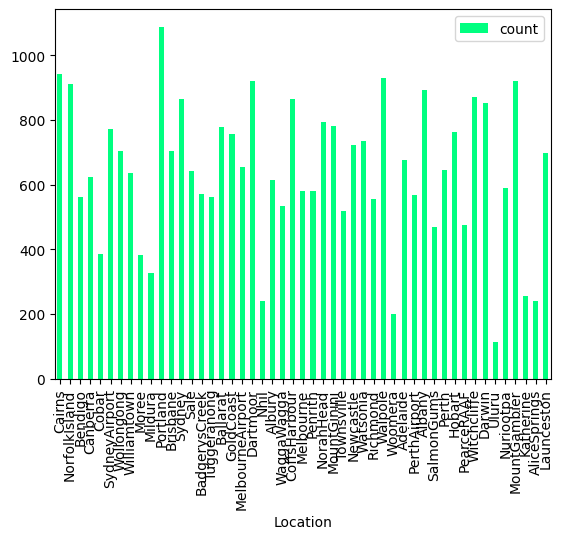

In [156]:
pandasDF = sql.toPandas()
pandasDF.plot(kind='bar',x='Location',y='count',colormap='winter_r')

<h1>Distribución de las lluvias por día del año</h1>

<Axes: ylabel='Frequency'>

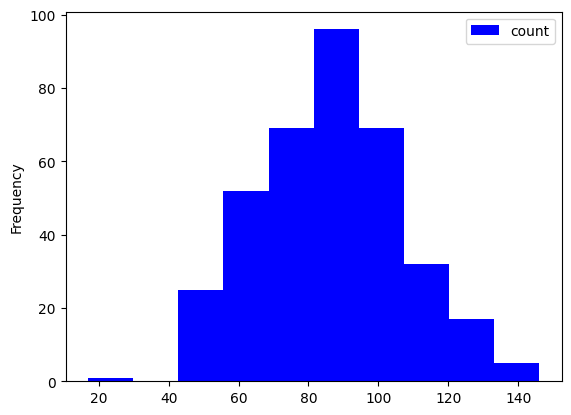

In [157]:
sql = df.filter(df.RainTodayBin == 1).groupby('DayYear').count()
pandasDF = sql.toPandas()
pandasDF.plot(kind='hist',x='DayYear',y='count',color="b")
